# Data Cleaning

## Imports

In [1]:
import pandas as pd
from functools import reduce
import joblib
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
plt.style.use(('fivethirtyeight', 'ggplot'))

## Functions

In [2]:
def describe_dataframe(df: pd.DataFrame,
                       show_report=True,
                       return_df=False) -> None or pd.DataFrame:
    """
    Statistical description of the pandas.DataFrame.
    --version :: 0.1--
    """
    left = df.describe(include='all', datetime_is_numeric=True).round(2).T
    right = pd.DataFrame(df.dtypes)
    right.columns = ['dtype']
    ret_df = pd.merge(left=left,
                      right=right,
                      left_index=True,
                      right_index=True)
    na_df = pd.DataFrame(df.isna().sum())
    na_df.columns = ['nulls']
    ret_df = pd.merge(left=ret_df,
                      right=na_df,
                      left_index=True,
                      right_index=True)
    ret_df.fillna('', inplace=True)

    if show_report:
        pd.set_option('display.max_rows', None)
        pd.set_option("max_columns", None)
#         pd.set_option('precision', 2)
        display(ret_df)
        pd.reset_option('max_columns')
        pd.reset_option('max_rows')
        pd.reset_option('precision')
    elif return_df:
        return ret_df
    elif show_report and return_df:
        pd.set_option('display.max_rows', None)
        pd.set_option("max_columns", None)
#         pd.set_option('precision', 2)
        display(ret_df)
        pd.reset_option('max_columns')
        pd.reset_option('max_rows')
        pd.reset_option('precision')
        return ret_df

In [3]:
def check_duplicates(df: pd.DataFrame,
                     verbose: int = 0,
                     limit_output: bool = True,
                     limit_num: int = 150):
    """
    Checks for duplicates in the pandas DataFrame and return a Dataframe of report.

    Parameters:
    ===========
    df = pandas.DataFrame
    verbose = `int` or `boolean`; default: `False`
    limit_output = `int` or `boolean`; default: `True`
                `True` limits featurs display to 150.
                `False` details of unique features.
    limit_num = `int`, limit number of uniques; default: 150,

    Returns:
    ========
    pandas.DataFrame, if verbose = 1.

    ---version 1.3---
    """
    dup_checking = []
    for column in df.columns:
        not_duplicated = df[column].duplicated().value_counts()[0]
        try:
            duplicated = df[column].duplicated().value_counts()[1]
        except:
            duplicated = 0
        temp_dict = {
            'name': column,
            'duplicated': duplicated,
            'not_duplicated': not_duplicated
        }
        dup_checking.append(temp_dict)
    df_ = pd.DataFrame(dup_checking)

    if verbose > 0:
        if limit_output:
            for col in df:
                if (len(df[col].unique())) <= limit_num:
                    print(
                        f"{col} >> number of uniques: {len(df[col].unique())}\nValues:\n{df[col].unique()}"
                    )
                else:
                    print(
                        f"{col} >> number of uniques: {len(df[col].unique())}, showing top {limit_num} values\nTop {limit_num} Values:\n{df[col].unique()[:limit_num]}\n"
                    )
                print(f"{'_'*60}\n")
        else:
            for col in df:
                print(
                    f"{col} >> number of uniques: {len(df[col].unique())}\nValues:\n{df[col].unique()}"
                )
    if 1 > verbose >= 0:
        return df_

# LOAD & SCRUB

## Data loading and merging

In [2]:
noaa_50to96_df = pd.read_excel('./data/NOAA Data (1950-1996).xlsx',
                               verbose=True)

Reading sheet 0


In [3]:
noaa_50to96_df.shape

(280803, 51)

In [4]:
noaa_50to96_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [5]:
noaa_97to20_df = pd.read_excel('./data/NOAA Data (1997-2021).xlsx',
                               sheet_name=None,
                               verbose=True)
temp_df = []
for i in noaa_97to20_df.keys():
    print(f"Working on {i}")
    temp_df.append(noaa_97to20_df[i])
print("Creating dataframe")
temp_df = pd.concat(temp_df, ignore_index=True)
print("DONE!!")

Reading sheet (1997-2012
Reading sheet (2013-2021)
Working on (1997-2012
Working on (2013-2021)
Creating dataframe
DONE!!


In [6]:
temp_df.shape

(1407050, 51)

In [7]:
df = noaa_50to96_df.append(temp_df)

In [8]:
df.shape

(1687853, 51)

In [9]:
df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0.0,NaN,NaN,35.12,-99.2,35.17,-99.2,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0.0,NaN,NaN,31.9,-98.6,31.73,-98.6,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.58,-75.7,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.6,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB


In [10]:
df.tail()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
1407045,202103,28,835,202103,28,1800,157284,951190,KENTUCKY,21,...,1.0,SW,CRANKS,36.7652,-83.1623,36.7618,-83.1772,A warm front lifted north into the state Satur...,Pictures on social media showed water surround...,CSV
1407046,202103,11,1700,202103,14,400,157256,950622,ARIZONA,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A slow moving large area of low pressure broug...,Snow began to fall over the Western Mogollon R...,CSV
1407047,202103,19,1900,202103,20,2000,157357,951221,IDAHO,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Pacific system brought about 6 to 10 inches ...,The Island Park COOP observer recorded 9.4 inc...,CSV
1407048,202103,19,2100,202103,20,2000,157357,951222,IDAHO,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Pacific system brought about 6 to 10 inches ...,Six inches of snow fell in Sugar City and 6 in...,CSV
1407049,202103,17,545,202103,17,545,155786,939776,TEXAS,48,...,2.0,SE,PURLEY,33.0765,-95.2241,33.0765,-95.2241,A strong closed upper low pressure system ejec...,Trees were blown down just east of Highway 37 ...,CSV


## Initial Saving 

In [11]:
joblib.dump(df,'./data/joined_df.joblib', compress=9)

['./data/joined_df.joblib']

In [ ]:
# # house keeping, to free up memory
# temp_df = None
# noaa_97to20_df = None
# noaa_50to96_df = None

In [12]:
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0.0,NaN,NaN,35.12,-99.2,35.17,-99.2,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0.0,NaN,NaN,31.9,-98.6,31.73,-98.6,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.58,-75.7,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.6,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407045,202103,28,835,202103,28,1800,157284,951190,KENTUCKY,21,...,1.0,SW,CRANKS,36.7652,-83.1623,36.7618,-83.1772,A warm front lifted north into the state Satur...,Pictures on social media showed water surround...,CSV
1407046,202103,11,1700,202103,14,400,157256,950622,ARIZONA,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A slow moving large area of low pressure broug...,Snow began to fall over the Western Mogollon R...,CSV
1407047,202103,19,1900,202103,20,2000,157357,951221,IDAHO,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Pacific system brought about 6 to 10 inches ...,The Island Park COOP observer recorded 9.4 inc...,CSV
1407048,202103,19,2100,202103,20,2000,157357,951222,IDAHO,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Pacific system brought about 6 to 10 inches ...,Six inches of snow fell in Sugar City and 6 in...,CSV


In [13]:
print(len(df.columns))
df.columns

51


Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [14]:
# light scrubing
df.YEAR.unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999,
       ' a handful of other homes had minor damage', 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=object)

In [15]:
# checking the values
df[df.YEAR==' a handful of other homes had minor damage']

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
132684,f a mobile home and house,however extensive tree damage with some large...,warranting an F1 rating in each county. The 3...,E3,formed 7 miles south-southeast of Omega in Ki...,5 miles west-northwest of Kingfisher where a ...,well-built brick home was severely damaged. ...,half the walls were collapsed or missing,and the roof was gone,warranting an F3 rating. Along the remainder ...,...,rated F0,was confined to trees,ballfield equipment at Redlands Community Col...,and a few roofs. The 2nd tornado,G2,formed about 1 mile northeast of El Reno in C...,varying in width from 100 to 500 yards,before dissipating 8 miles south-southwest of...,and 3 other homes received F1 damage. The rem...,trees
132686,f a mobile home and house,however extensive tree damage with some large...,warranting an F1 rating in each county. The 3...,E3,formed 7 miles south-southeast of Omega in Ki...,5 miles west-northwest of Kingfisher where a ...,well-built brick home was severely damaged. ...,half the walls were collapsed or missing,and the roof was gone,warranting an F3 rating. Along the remainder ...,...,rated F0,was confined to trees,ballfield equipment at Redlands Community Col...,and a few roofs. The 2nd tornado,G2,formed about 1 mile northeast of El Reno in C...,varying in width from 100 to 500 yards,before dissipating 8 miles south-southwest of...,and 3 other homes received F1 damage. The rem...,trees
132688,f a mobile home and house,however extensive tree damage with some large...,warranting an F1 rating in each county. The 3...,E3,formed 7 miles south-southeast of Omega in Ki...,5 miles west-northwest of Kingfisher where a ...,well-built brick home was severely damaged. ...,half the walls were collapsed or missing,and the roof was gone,warranting an F3 rating. Along the remainder ...,...,rated F0,was confined to trees,ballfield equipment at Redlands Community Col...,and a few roofs. The 2nd tornado,G2,formed about 1 mile northeast of El Reno in C...,varying in width from 100 to 500 yards,before dissipating 8 miles south-southwest of...,and 3 other homes received F1 damage. The rem...,trees
132690,f a mobile home and house,however extensive tree damage with some large...,warranting an F1 rating in each county. The 3...,E3,formed 7 miles south-southeast of Omega in Ki...,5 miles west-northwest of Kingfisher where a ...,well-built brick home was severely damaged. ...,half the walls were collapsed or missing,and the roof was gone,warranting an F3 rating. Along the remainder ...,...,rated F0,was confined to trees,ballfield equipment at Redlands Community Col...,and a few roofs. The 2nd tornado,G2,formed about 1 mile northeast of El Reno in C...,varying in width from 100 to 500 yards,before dissipating 8 miles south-southwest of...,and 3 other homes received F1 damage. The rem...,trees
132692,f a mobile home and house,however extensive tree damage with some large...,warranting an F1 rating in each county. The 3...,E3,formed 7 miles south-southeast of Omega in Ki...,5 miles west-northwest of Kingfisher where a ...,well-built brick home was severely damaged. ...,half the walls were collapsed or missing,and the roof was gone,warranting an F3 rating. Along the remainder ...,...,rated F0,was confined to trees,ballfield equipment at Redlands Community Col...,and a few roofs. The 2nd tornado,G2,formed about 1 mile northeast of El Reno in C...,varying in width from 100 to 500 yards,before dissipating 8 miles south-southwest of...,and 3 other homes received F1 damage. The rem...,trees
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138273,f a mobile home and house,however extensive tree damage with some large...,warranting an F1 rating in each county. The 3...,E3,formed 7 miles south-southeast 

In [16]:
# cleaning
df = df[df.YEAR!=' a handful of other homes had minor damage']
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,0.0,NaN,NaN,35.12,-99.2,35.17,-99.2,NaN,NaN,PUB
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,0.0,NaN,NaN,31.9,-98.6,31.73,-98.6,NaN,NaN,PUB
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.58,-75.7,40.65,-75.47,NaN,NaN,PUB
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,0.0,NaN,NaN,40.6,-76.75,NaN,NaN,NaN,NaN,PUB
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407045,202103,28,835,202103,28,1800,157284,951190,KENTUCKY,21,...,1.0,SW,CRANKS,36.7652,-83.1623,36.7618,-83.1772,A warm front lifted north into the state Satur...,Pictures on social media showed water surround...,CSV
1407046,202103,11,1700,202103,14,400,157256,950622,ARIZONA,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A slow moving large area of low pressure broug...,Snow began to fall over the Western Mogollon R...,CSV
1407047,202103,19,1900,202103,20,2000,157357,951221,IDAHO,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Pacific system brought about 6 to 10 inches ...,The Island Park COOP observer recorded 9.4 inc...,CSV
1407048,202103,19,2100,202103,20,2000,157357,951222,IDAHO,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Pacific system brought about 6 to 10 inches ...,Six inches of snow fell in Sugar City and 6 in...,CSV


In [17]:
df.YEAR.unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021], dtype=object)

## Sea level

In [53]:
epa_sea = pd.read_csv('./data/EPA Sea Level Readings (1880-2020).csv',
                      skiprows=6)
epa_sea

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches)
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
135,2015,NaN,NaN,NaN,8.925435
136,2016,NaN,NaN,NaN,9.036237
137,2017,NaN,NaN,NaN,9.087686
138,2018,NaN,NaN,NaN,9.221200


In [199]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

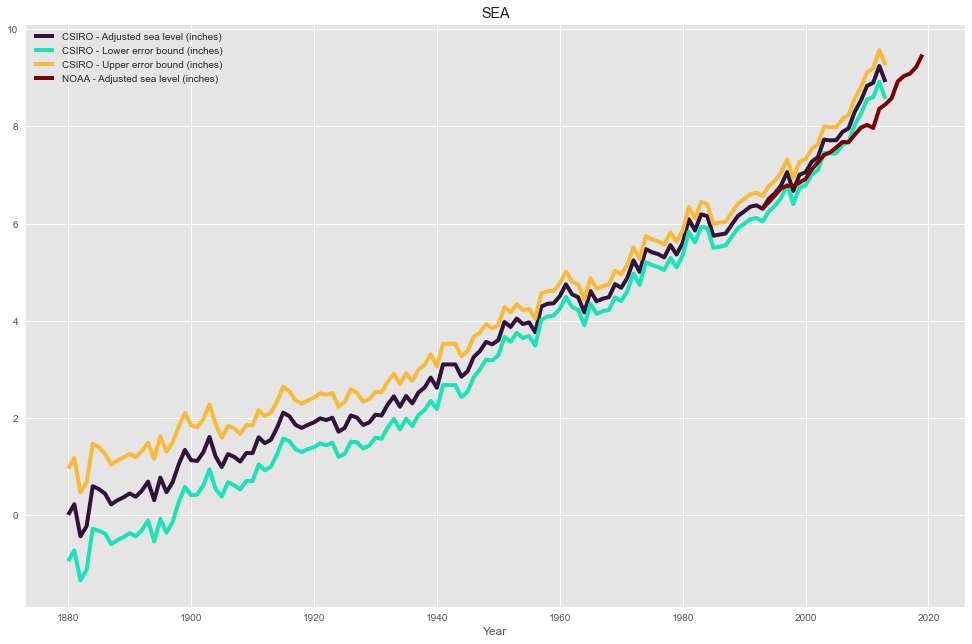

In [221]:
epa_sea.set_index('Year').plot(figsize=(15, 10),
                               title=f'{"sea".upper()}',
                               colormap='turbo');

## Lake

In [222]:
epa_lake = pd.read_csv('./data/EPA Lake Ice Readings (1850-2019).csv',
                      skiprows=6)
epa_lake

,Year,Detroit Lake,Lake George,Lake Mendota,Lake Monona,Mirror Lake,Otsego Lake,Shell Lake,Lake Superior at Bayfield,Geneva Lake
0,1849,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN,NaN
1,1850,NaN,NaN,NaN,NaN,NaN,10.333333,NaN,NaN,NaN
2,1851,NaN,NaN,NaN,NaN,NaN,9.444444,NaN,NaN,NaN
3,1852,NaN,NaN,NaN,NaN,NaN,6.555556,NaN,NaN,NaN
4,1853,NaN,NaN,NaN,NaN,NaN,9.111111,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
166,2015,-39.2,26.200000,5.000000,-3.777778,-21.2,14.555556,-23.2,NaN,17.833333
167,2016,-39.2,26.333333,4.111111,-3.822222,-21.2,13.952381,NaN,NaN,17.857143
168,2017,-41.0,26.428571,3.222222,-3.533333,-21.2,12.000000,NaN,NaN,15.571429
169,2018,-41.0,27.000000,5.555556,-0.911111,-21.2,10.333333,NaN,NaN,18.000000


<AxesSubplot:title={'center':'LAKE'}, xlabel='Year'>

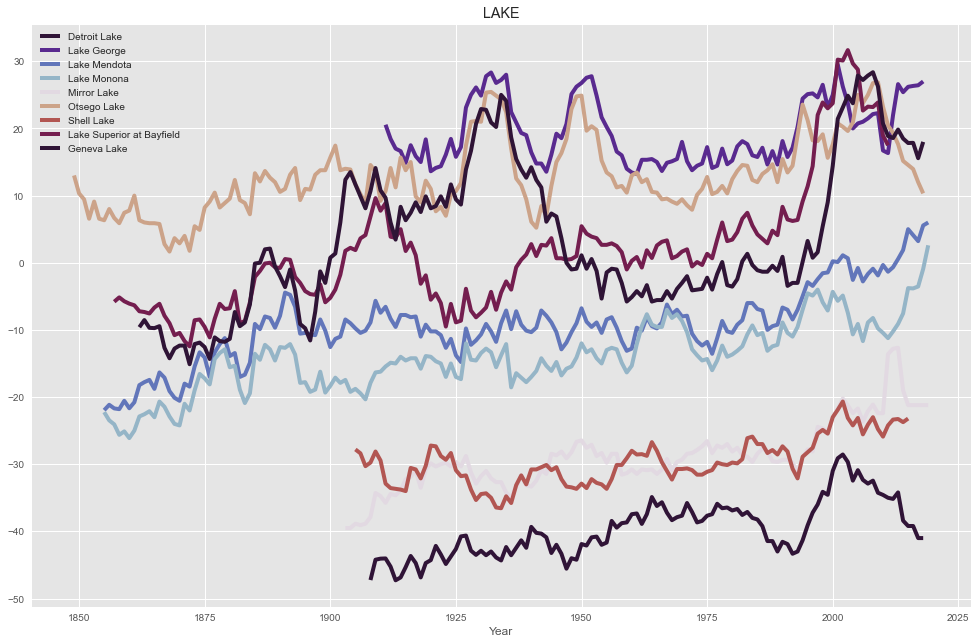

In [223]:
epa_lake.set_index('Year').plot(figsize=(15, 10),
                                title=f'{"lake".upper()}',
                                colormap='twilight_shifted')

## Temp

In [55]:
epa_temp_high_low = pd.read_csv('./data/EPA Unusual High and Low Temps (1910-2020).csv',
                      skiprows=6)
epa_temp_high_low

,Year,Hot daily highs,Hot daily highs (smoothed),Hot daily lows,Hot daily lows (smoothed)
0,1910,0.074,0.071973,0.020,0.021004
1,1911,0.087,0.072895,0.031,0.023023
2,1912,0.004,0.080355,0.000,0.029832
3,1913,0.155,0.087617,0.033,0.039355
4,1914,0.139,0.081410,0.117,0.042320
...,...,...,...,...,...
106,2016,0.271,0.201555,0.543,0.414891
107,2017,0.264,0.226715,0.338,0.436367
108,2018,0.263,0.234953,0.627,0.433582
109,2019,0.099,0.248465,0.191,0.431555


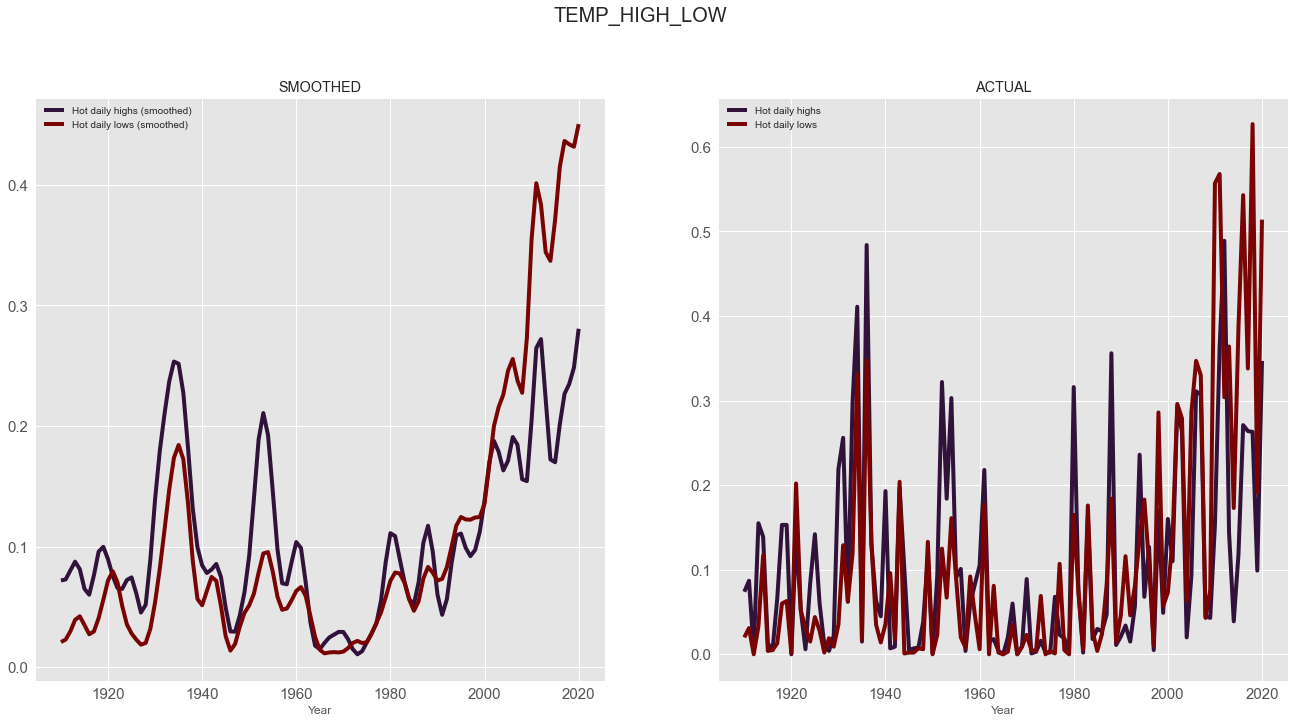

In [227]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

epa_temp_high_low.set_index('Year')[[
    'Hot daily highs (smoothed)', 'Hot daily lows (smoothed)'
]].plot(title=f'{"smoothed".upper()}', colormap='turbo', ax=ax1, fontsize=15)

epa_temp_high_low.set_index('Year')[['Hot daily highs', 'Hot daily lows'
                                     ]].plot(title=f'{"actual".upper()}',
                                             colormap='turbo',
                                             fontsize=15,
                                             ax=ax2)

plt.suptitle(f'{"temp_high_low".upper()}', va='bottom', size=20)
plt.show()

In [60]:
epa_temp = pd.read_csv('./data/EPA seasonal-temperature(1896-2020).csv',
                      skiprows=6)
epa_temp

,Year,Winter,Spring,Summer,Fall
0,1896,0.51,0.02,0.55,-2.49
1,1897,0.14,-0.55,-0.46,0.59
2,1898,0.04,-0.33,0.38,-1.77
3,1899,-4.28,-1.54,-0.24,1.02
4,1900,-0.07,0.62,0.70,0.79
...,...,...,...,...,...
120,2016,4.55,2.75,2.10,4.05
121,2017,3.67,2.59,1.29,2.11
122,2018,1.76,1.51,2.10,0.20
123,2019,1.07,-0.05,0.96,0.31


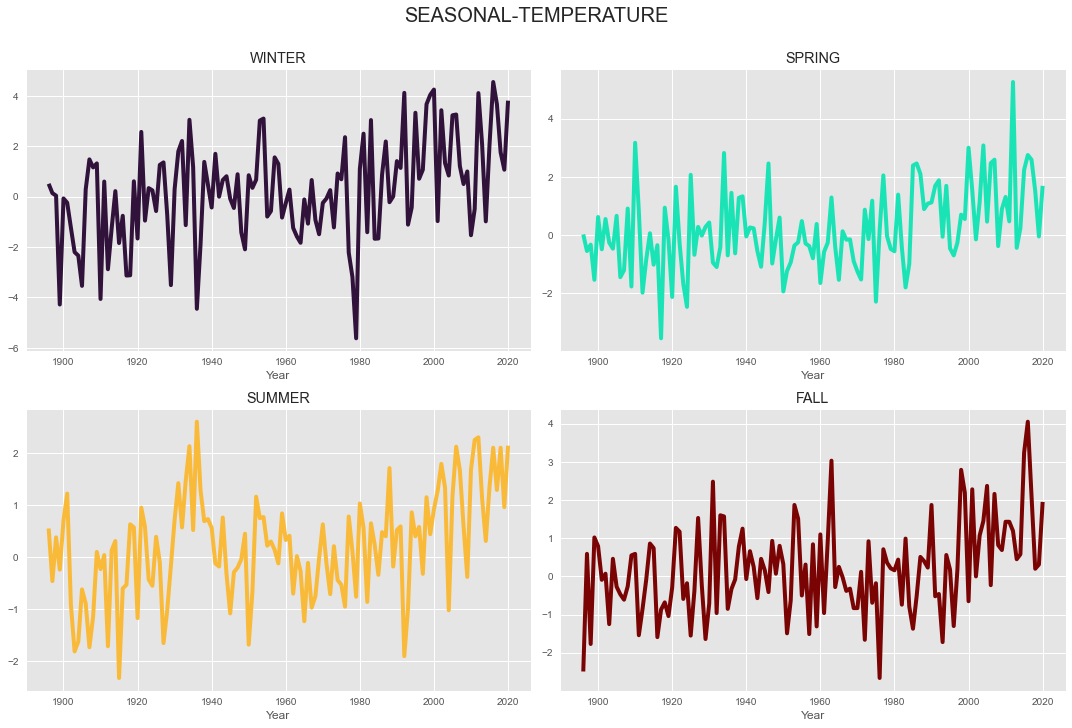

In [228]:
epa_temp.set_index('Year').plot(
    figsize=(15, 10),
    legend=False,
    grid=True,
    title=[x.upper() for x in epa_temp.set_index('Year').columns],
    subplots=True,
    layout=(2, 2),
    sharex=False,
    colormap='turbo')
plt.suptitle(f'{"seasonal-temperature".upper()}', va='bottom', fontsize=20)
plt.tight_layout()

In [83]:
epa_earth_temp = pd.read_csv(
    './data/EPA Earth Surface temperature (1900-2020).csv', skiprows=6)
epa_earth_temp

,Year,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS)
0,1901,-0.15,NaN,NaN
1,1902,-0.43,NaN,NaN
2,1903,-1.40,NaN,NaN
3,1904,-0.86,NaN,NaN
4,1905,-1.02,NaN,NaN
...,...,...,...,...
115,2016,2.90,1.99069,2.472315
116,2017,2.53,2.21119,2.361615
117,2018,1.50,1.60219,1.800165
118,2019,0.66,1.08769,1.192665


<AxesSubplot:title={'center':'EARTH_TEMP'}, xlabel='Year'>

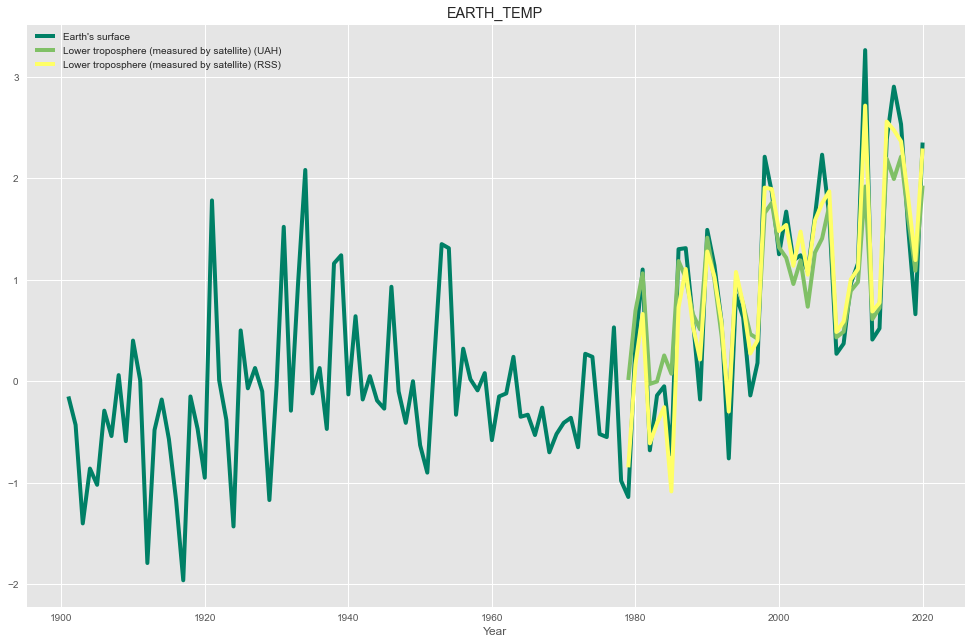

In [229]:
epa_earth_temp.set_index('Year').plot(
    figsize=(15, 10),title=f'{"earth_temp".upper()}',
    colormap='summer')

## Precipitation

In [86]:
epa_rain = pd.read_csv('./data/EPA Precipitation (1901-2020).csv',
                      skiprows=6)
epa_rain

,Year,Anomaly
0,1901,-2.31
1,1902,0.69
2,1903,-0.58
3,1904,-1.99
4,1905,2.66
...,...,...
115,2016,1.48
116,2017,2.37
117,2018,4.71
118,2019,4.88


<AxesSubplot:title={'center':'RAIN_ANAMOLY'}, xlabel='Year'>

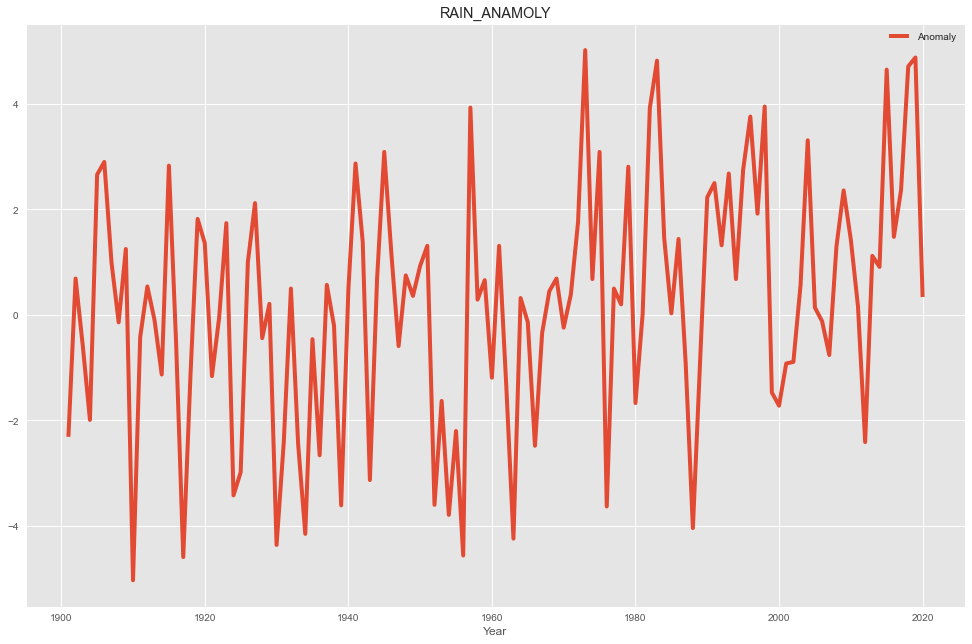

In [230]:
epa_rain.set_index('Year').plot(
    figsize=(15, 10),title=f'{"rain_anamoly".upper()}')

## Greenhouse Gas

In [89]:
epa_greenh_gas = pd.read_csv('./data/EPA Greenhouse Gas Emissions (1990-2019).csv',
                      skiprows=6)
epa_greenh_gas

,Year,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"
0,1990,5113.454675,776.872695,452.657524,99.665733
1,1991,5057.930940,781.779432,443.229443,90.681319
2,1992,5167.480847,780.519139,443.066108,95.277742
3,1993,5267.343060,770.710149,471.293158,95.003522
4,1994,5358.824048,777.032032,456.990572,98.976178
5,1995,5421.502465,767.697234,468.807734,117.852811
6,1996,5610.581589,760.808472,480.769690,129.005625
7,1997,5686.464995,746.757333,466.844894,136.440818
8,1998,5731.049595,731.667549,467.696827,152.855296
9,1999,5804.668919,713.351443,457.479569,149.899097


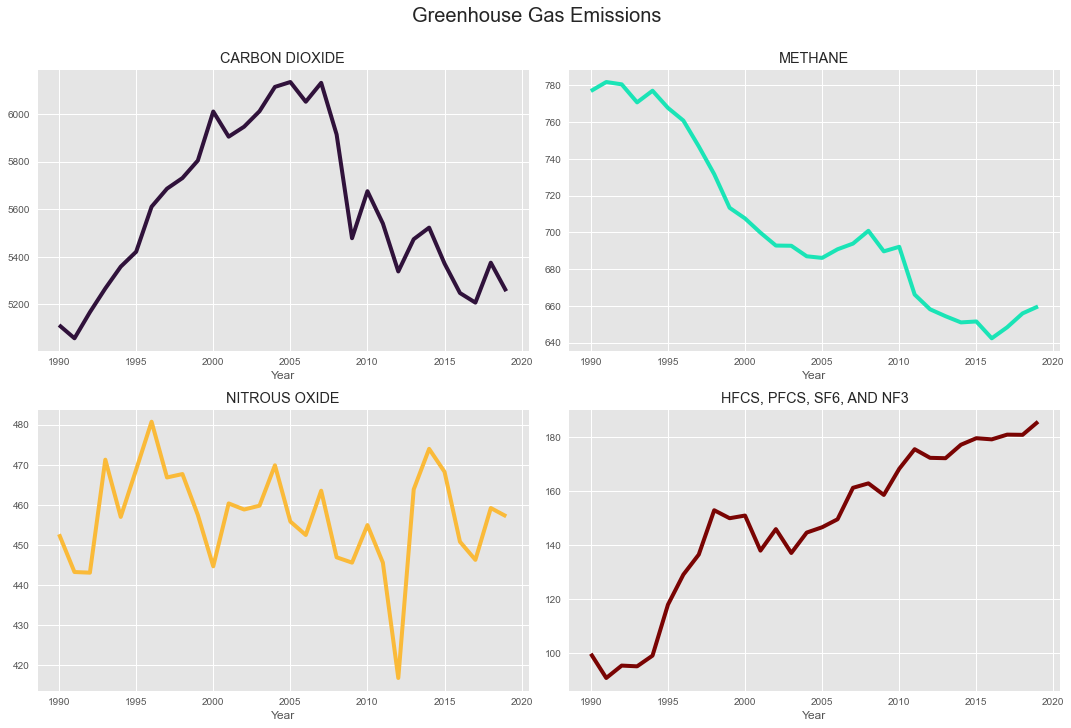

In [231]:
epa_greenh_gas.set_index('Year').plot(
    figsize=(15, 10),
    legend=False,
    grid=True,
    title=[x.upper() for x in epa_greenh_gas.set_index('Year').columns],
    subplots=True,
    layout=(2, 2),
    sharex=False,
    colormap='turbo')
plt.suptitle(f'{"Greenhouse Gas Emissions".title()}', va='bottom', fontsize=20)
plt.tight_layout()

## Merging

In [27]:
data_frames = [
    epa_sea, epa_lake, epa_temp_high_low, epa_temp, epa_earth_temp, epa_rain,
    epa_greenh_gas
]

In [28]:
to_merge_df = reduce(
    lambda left, right: pd.merge(left, right, on=['Year'], how='outer'),
    data_frames)
to_merge_df

,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Detroit Lake,Lake George,Lake Mendota,Lake Monona,Mirror Lake,...,Summer,Fall,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS),Anomaly,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"
0,1880,0.000000,-0.952756,0.952756,NaN,NaN,NaN,-13.888889,-15.555556,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1881,0.220472,-0.732283,1.173228,NaN,NaN,NaN,-13.444444,-15.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN,NaN,NaN,-17.000000,-18.888889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN,NaN,NaN,-16.666667,-20.888889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1884,0.590551,-0.283465,1.464567,NaN,NaN,NaN,-14.888889,-19.444444,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,1876,NaN,NaN,NaN,NaN,NaN,NaN,-17.000000,-18.111111,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,1877,NaN,NaN,NaN,NaN,NaN,NaN,-13.333333,-14.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,1878,NaN,NaN,NaN,NaN,NaN,NaN,-12.111111,-13.444444,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,1879,NaN,NaN,NaN,NaN,NaN,NaN,-11.222222,-12.888889,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = pd.merge(df, to_merge_df, left_on='YEAR', right_on='Year')

In [30]:
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,Summer,Fall,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS),Anomaly,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40,...,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48,...,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,42,...,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,42,...,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42,...,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663071,202012,16,1230,202012,17,600,153856,926458,PENNSYLVANIA,42,...,2.14,1.95,2.35,1.92619,2.291715,0.34,NaN,NaN,NaN,NaN
1663072,202012,24,1600,202012,24,2000,153868,926553,TENNESSEE,47,...,2.14,1.95,2.35,1.92619,2.291715,0.34,NaN,NaN,NaN,NaN
1663073,202012,24,1600,202012,24,2000,153868,926555,TENNESSEE,47,...,2.14,1.95,2.35,1.92619,2.291715,0.34,NaN,NaN,NaN,NaN
1663074,202012,24,1600,202012,24,2000,153868,926558,TENNESSEE,47,...,2.14,1.95,2.35,1.92619,2.291715,0.34,NaN,NaN,NaN,NaN


In [31]:
# joblib.dump(df, './data/all_merged_df.joblib', compress=('gzip', 9))

['./data/all_merged_df.joblib']

In [32]:
# # house keeping, to free memory
# data_frames = None
# to_merge_df = None
# epa_sea = None
# epa_lake = None
# epa_temp_high_low = None
# epa_temp = None
# epa_earth_temp = None
# epa_rain = None
# epa_greenh_gas = None

## Merged df cleaning; dtype

In [4]:
# df = joblib.load('./data/all_merged_df.joblib')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663076 entries, 0 to 1663075
Data columns (total 81 columns):
 #   Column                                           Non-Null Count    Dtype  
---  ------                                           --------------    -----  
 0   BEGIN_YEARMONTH                                  1663076 non-null  object 
 1   BEGIN_DAY                                        1663076 non-null  object 
 2   BEGIN_TIME                                       1663076 non-null  object 
 3   END_YEARMONTH                                    1663076 non-null  object 
 4   END_DAY                                          1663076 non-null  object 
 5   END_TIME                                         1663076 non-null  object 
 6   EPISODE_ID                                       1430837 non-null  object 
 7   EVENT_ID                                         1663076 non-null  object 
 8   STATE                                            1663075 non-null  object 
 9   ST

In [6]:
# correct data type
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
describe_dataframe(df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,nulls
BEGIN_YEARMONTH,1663076.0,,,,200506.62,1192.5,195001.0,199909.0,200708.0,201401.0,202012.0,int64,0
BEGIN_DAY,1663076.0,,,,15.02,9.08,1.0,7.0,15.0,23.0,31.0,int64,0
BEGIN_TIME,1663076.0,,,,1321.97,667.21,0.0,900.0,1515.0,1820.0,2359.0,int64,0
END_YEARMONTH,1663076.0,,,,200506.62,1192.5,195001.0,199909.0,200708.0,201401.0,202012.0,int64,0
END_DAY,1663076.0,,,,16.34,9.09,1.0,8.0,16.0,24.0,31.0,int64,0
END_TIME,1663076.0,,,,1480.83,604.92,0.0,1152.0,1611.0,1907.0,2359.0,int64,0
EPISODE_ID,1430837.0,,,,606327.11,1606687.22,1.0,62979.0,125634.0,1154115.0,990000001.0,float64,232239
EVENT_ID,1663076.0,,,,3455860.79,3749275.43,3.0,439316.75,877772.5,5539713.25,990000003.0,int64,0
STATE,1663075.0,68,TEXAS,133313,,,,,,,,object,1
STATE_FIPS,1663075.0,,,,31.81,17.34,1.0,19.0,31.0,45.0,99.0,float64,1


### DAMAGE_PROPERTY

In [7]:
df.DAMAGE_PROPERTY.apply(lambda x: str(x)[-1]).value_counts()

K    908256
n    534624
0    200222
M     19753
B       107
1        28
5        26
2        16
3        13
6         9
4         6
7         5
H         5
9         3
8         2
h         1
Name: DAMAGE_PROPERTY, dtype: int64

In [8]:
pd.set_option("max_columns", None)

In [9]:
df[df.DAMAGE_PROPERTY.str.contains('h|H', na=False)]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Detroit Lake,Lake George,Lake Mendota,Lake Monona,Mirror Lake,Otsego Lake,Shell Lake,Lake Superior at Bayfield,Geneva Lake,Hot daily highs,Hot daily highs (smoothed),Hot daily lows,Hot daily lows (smoothed),Winter,Spring,Summer,Fall,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS),Anomaly,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"
200105,199409,16,1630,199409,16,1630,NaN,10329434,MICHIGAN,26.0,1994,September,Thunderstorm Wind,C,37,CLINTON,NaN,1994-09-16 16:30:00,EST,1994-09-16 16:30:00,0,0,0,0,2h,0,NaN,50.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,S,St. Johns,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wind damage reported at Parks Rd. and U.S. Hig...,CSV,1994,6.507874,6.248031,6.767717,6.438624,-41.333333,24.444444,-5.000000,-7.000000,-29.000000,23.555556,-28.888889,9.125,0.125,0.236,0.109371,0.138,0.117453,-0.43,1.69,0.86,0.56,0.85,1.00369,1.075515,0.68,5358.824048,777.032032,456.990572,98.976178
220164,199503,8,1305,199503,8,1305,NaN,10346749,SOUTH CAROLINA,45.0,1995,March,Thunderstorm Wind,C,59,LAURENS,NaN,1995-03-08 13:05:00,EST,1995-03-08 13:05:00,0,0,0,0,2H,0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Mountville,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front moving through the area ge...,CSV,1995,6.622047,6.362205,6.881890,6.576714,-39.111111,25.111111,-2.888889,-4.555556,-27.777778,21.222222,-28.222222,11.375,3.250,0.068,0.110887,0.183,0.124637,3.33,-0.46,0.40,0.18,0.63,0.75919,0.761115,2.75,5421.502465,767.697234,468.807734,117.852811
223217,199507,15,1818,199507,15,1824,NaN,10357118,WYOMING,56.0,1995,July,Hail,C,5,CAMPBELL,NaN,1995-07-15 18:18:00,MST,1995-07-15 18:24:00,2,0,0,0,5H,0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Gillette,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One inch diameter hail fell in Recluse and in ...,CSV,1995,6.622047,6.362205,6.881890,6.576714,-39.111111,25.111111,-2.888889,-4.555556,-27.777778,21.222222,-28.222222,11.375,3.250,0.068,0.110887,0.183,0.124637,3.33,-0.46,0.40,0.18,0.63,0.75919,0.761115,2.75,5421.502465,767.697234,468.807734,117.852811
226655,199501,14,1050,199501,14,1050,NaN,10346707,SOUTH CAROLINA,45.0,1995,January,Thunderstorm Wind,C,59,LAURENS,NaN,1995-01-14 10:50:00,EST,1995-01-14 10:50:00,0,0,0,0,5H,0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,Clinton,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A line of severe thunderstorms with a ""bow ech...",CSV,1995,6.622047,6.362205,6.881890,6.576714,-39.111111,25.111111,-2.888889,-4.555556,-27.777778,21.222222,-28.222222,11.375,3.250,0.068,0.110887,0.183,0.124637,3.33,-0.46,0.40,0.18,0.63,0.75919,0.761115,2.75,5421.502465,767.697234,468.807734,117.852811
227460,199507,12,1300,199507,12,1335,NaN,10357105,WYOMING,56.0,1995,July,Thunderstorm Wind,C,3,BIG HORN,NaN,1995-07-12 13:00:00,MST,1995-07-12 13:35:00,0,0,0,0,5H,0,NaN,54.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Strong thunderstorm winds knocked down a tree,...",CSV,1995,6.622047,6.362205,6.881890,6.576714,-39.111111,25.111111,-2.888889,-4.555556,-27.777778,21.222222,-28.222222,11.375,3.250,0.068,0.110887,0.183,0.124637,3.33,-0.46,0.40,0.18,0.63,0.75919,0.761115,2.75,5421.502465,767.697234,468.807734,

In [10]:
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(
    lambda x: re.sub('h|H', 'K', str(x)))

In [11]:
df[df.DAMAGE_PROPERTY.str.contains('h|H', na=False)]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Detroit Lake,Lake George,Lake Mendota,Lake Monona,Mirror Lake,Otsego Lake,Shell Lake,Lake Superior at Bayfield,Geneva Lake,Hot daily highs,Hot daily highs (smoothed),Hot daily lows,Hot daily lows (smoothed),Winter,Spring,Summer,Fall,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS),Anomaly,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"


In [12]:
def _converter_1(x):
    if isinstance(x, (int, float)):
        return x
    elif len(x) == 1 and x == 'K':
        return 0
    elif str(x[-1]) == 'K':
        return float(x[:-1]) * 1000
    elif str(x[-1]) == 'M':
        return float(x[:-1]) * 1000_000
    elif str(x[-1]) == 'B':
        return float(x[:-1]) * 1000_000_000

In [13]:
df.DAMAGE_PROPERTY = df.DAMAGE_PROPERTY.apply(lambda x: _converter_1(x))

<AxesSubplot:title={'center':'Damage_Property Over Time'}, xlabel='BEGIN_DATE_TIME'>

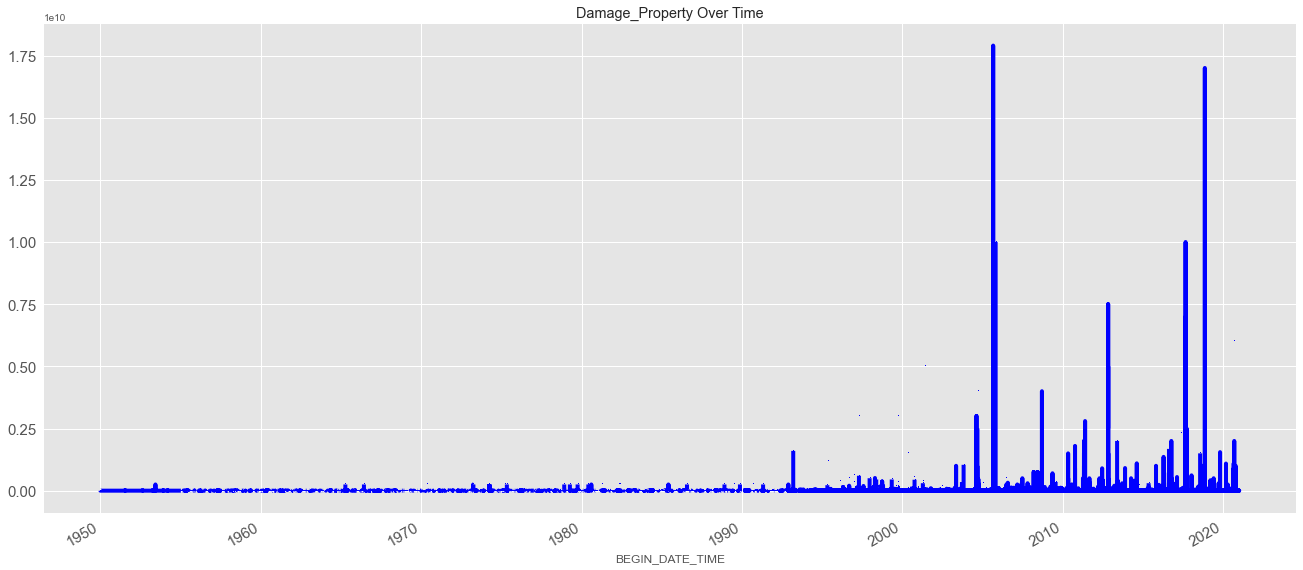

In [232]:
df[['DAMAGE_PROPERTY', 'BEGIN_DATE_TIME']].set_index('BEGIN_DATE_TIME').plot(
    figsize=(20, 10),
    legend=False,
    fontsize=15,
    title='DAMAGE_PROPERTY over time'.title(),
    marker=',',
    colormap='winter')

In [185]:
# _ = pd.DataFrame(df.DAMAGE_PROPERTY.value_counts())
# # _.sort_values(by='DAMAGE_PROPERTY')
# # _[(_.DAMAGE_PROPERTY>2) & (_.DAMAGE_PROPERTY<10)]
# _.sort_index().head(30)

### DAMAGE_CROPS

In [15]:
def _converter_2(x):
    if isinstance(x, (int, float)):
        return x
    elif len(x) == 1 and x == 'K': # only x == 'K' is enough
        return 0
    elif len(x) == 1 and x == 'M': # only x == 'M' is enough
        return 0
    elif str(x[0]) == '0':
        return 0
    elif str(x[-1]) == 'K':
        return float(x[:-1]) * 1000
    elif str(x[-1]) == 'M':
        return float(x[:-1]) * 1000_000
    elif str(x[-1]) == 'B':
        return float(x[:-1]) * 1000_000_000

In [16]:
df.DAMAGE_CROPS = df.DAMAGE_CROPS.apply(lambda x: _converter_2(x))

### Date

In [18]:
def _time_cleaner(time):
    time = str(time)
    if len(time) == 4:
        return time
    elif len(time) == 3:
        return '0' + time
    elif len(time) == 2:
        return '00' + time
    elif len(time) == 1:
        return '000' + time

In [19]:
def _date_cleaner(date):
    date = str(date)
    if len(date) == 2:
        return date
    elif len(date) == 1:
        return '0' + date

In [20]:
df.BEGIN_TIME = df.BEGIN_TIME.apply(lambda x: _time_cleaner(x))
df.END_TIME = df.END_TIME.apply(lambda x: _time_cleaner(x))
df.BEGIN_DAY = df.BEGIN_DAY.apply(lambda x: _date_cleaner(x))
df.END_DAY = df.END_DAY.apply(lambda x: _date_cleaner(x))

In [21]:
df[:15]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Detroit Lake,Lake George,Lake Mendota,Lake Monona,Mirror Lake,Otsego Lake,Shell Lake,Lake Superior at Bayfield,Geneva Lake,Hot daily highs,Hot daily highs (smoothed),Hot daily lows,Hot daily lows (smoothed),Winter,Spring,Summer,Fall,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS),Anomaly,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,1950-04-28 14:45:00,CST,1950-04-28 14:45:00,0,0,0,0,250000.0,0.0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,1950-04-29 15:30:00,CST,1950-04-29 15:30:00,0,0,0,0,25000.0,0.0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
2,195007,05,1800,195007,05,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,1950-07-05 18:00:00,CST,1950-07-05 18:00:00,2,0,0,0,25000.0,0.0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
3,195007,05,1830,195007,05,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,1950-07-05 18:30:00,CST,1950-07-05 18:30:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,1950-07-24 14:40:00,CST,1950-07-24 14:40:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
5,195008,29,1600,195008,29,1600,NaN,10104930,PENNSYLVANIA,42.0,1950,August,Tornado,C,17,BUCKS,NaN,1950-08-29 16:00:00,CST,1950-08-29 16:00:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F1,1.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.22,-75.00,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.

In [22]:
df.BEGIN_YEARMONTH = df.BEGIN_YEARMONTH.astype(str)
df.END_YEARMONTH = df.END_YEARMONTH.astype(str)

In [23]:
# testing
pd.to_datetime((df.BEGIN_YEARMONTH+df.BEGIN_DAY+df.BEGIN_TIME)[13])

Timestamp('1950-03-27 03:00:00')

In [24]:
# testing in a loop
for i in range(0, 100, 5):
    print(df.BEGIN_DATE_TIME[i] == pd.to_datetime((df.BEGIN_YEARMONTH +
                                                   df.BEGIN_DAY +
                                                   df.BEGIN_TIME)[i]))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [25]:
# deploy
df.BEGIN_DATE_TIME = pd.to_datetime(df.BEGIN_YEARMONTH + df.BEGIN_DAY +
                                    df.BEGIN_TIME)

df.END_DATE_TIME = pd.to_datetime(df.END_YEARMONTH + df.END_DAY + df.END_TIME)

In [26]:
df[:15]

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Detroit Lake,Lake George,Lake Mendota,Lake Monona,Mirror Lake,Otsego Lake,Shell Lake,Lake Superior at Bayfield,Geneva Lake,Hot daily highs,Hot daily highs (smoothed),Hot daily lows,Hot daily lows (smoothed),Winter,Spring,Summer,Fall,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS),Anomaly,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,1950-04-28 14:45:00,CST,1950-04-28 14:45:00,0,0,0,0,250000.0,0.0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,1950-04-29 15:30:00,CST,1950-04-29 15:30:00,0,0,0,0,25000.0,0.0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
2,195007,05,1800,195007,05,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,1950-07-05 18:00:00,CST,1950-07-05 18:00:00,2,0,0,0,25000.0,0.0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
3,195007,05,1830,195007,05,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,1950-07-05 18:30:00,CST,1950-07-05 18:30:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,1950-07-24 14:40:00,CST,1950-07-24 14:40:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
5,195008,29,1600,195008,29,1600,NaN,10104930,PENNSYLVANIA,42.0,1950,August,Tornado,C,17,BUCKS,NaN,1950-08-29 16:00:00,CST,1950-08-29 16:00:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F1,1.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.22,-75.00,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.0,0.051402,0.85,-1.94,-1.68,0.32,-0.

# Final df

In [27]:
df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Detroit Lake,Lake George,Lake Mendota,Lake Monona,Mirror Lake,Otsego Lake,Shell Lake,Lake Superior at Bayfield,Geneva Lake,Hot daily highs,Hot daily highs (smoothed),Hot daily lows,Hot daily lows (smoothed),Winter,Spring,Summer,Fall,Earth's surface,Lower troposphere (measured by satellite) (UAH),Lower troposphere (measured by satellite) (RSS),Anomaly,Carbon dioxide,Methane,Nitrous oxide,"HFCs, PFCs, SF6, and NF3"
0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,40.0,1950,April,Tornado,C,149,WASHITA,NaN,1950-04-28 14:45:00,CST,1950-04-28 14:45:00,0,0,0,0,250000.0,0.0,NaN,0.0,NaN,NaN,NaN,F3,3.4,400.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,35.12,-99.20,35.17,-99.20,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.000,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,48.0,1950,April,Tornado,C,93,COMANCHE,NaN,1950-04-29 15:30:00,CST,1950-04-29 15:30:00,0,0,0,0,25000.0,0.0,NaN,0.0,NaN,NaN,NaN,F1,11.5,200.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,31.90,-98.60,31.73,-98.60,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.000,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
2,195007,05,1800,195007,05,1800,NaN,10104927,PENNSYLVANIA,42.0,1950,July,Tornado,C,77,LEHIGH,NaN,1950-07-05 18:00:00,CST,1950-07-05 18:00:00,2,0,0,0,25000.0,0.0,NaN,0.0,NaN,NaN,NaN,F2,12.9,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.58,-75.70,40.65,-75.47,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.000,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
3,195007,05,1830,195007,05,1830,NaN,10104928,PENNSYLVANIA,42.0,1950,July,Tornado,C,43,DAUPHIN,NaN,1950-07-05 18:30:00,CST,1950-07-05 18:30:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F2,0.0,13.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,40.60,-76.75,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.000,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,42.0,1950,July,Tornado,C,39,CRAWFORD,NaN,1950-07-24 14:40:00,CST,1950-07-24 14:40:00,0,0,0,0,2500.0,0.0,NaN,0.0,NaN,NaN,NaN,F0,0.0,33.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN,PUB,1950,3.598425,3.287402,3.909449,NaN,-41.888889,26.777778,-6.777778,-12.0,-26.444444,24.888889,-32.888889,5.444444,1.111111,0.001,0.092578,0.000,0.051402,0.85,-1.94,-1.68,0.32,-0.63,NaN,NaN,0.93,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663071,202012,16,1230,202012,17,0600,153856.0,926458,PENNSYLVANIA,42.0,2020,December,Winter Storm,Z,71,

In [233]:
describe_dataframe(df)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std,dtype,nulls
BEGIN_YEARMONTH,1663076.0,848,200806,14589,,,,,,,,object,0
BEGIN_DAY,1663076.0,31,01,121617,,,,,,,,object,0
BEGIN_TIME,1663076.0,1440,0000,101992,,,,,,,,object,0
END_YEARMONTH,1663076.0,848,200806,14589,,,,,,,,object,0
END_DAY,1663076.0,31,31,72520,,,,,,,,object,0
END_TIME,1663076.0,1440,2359,75831,,,,,,,,object,0
EPISODE_ID,1430837.0,,,,606327.11,1.0,62979.0,125634.0,1154115.0,990000001.0,1606687.22,float64,232239
EVENT_ID,1663076.0,,,,3455860.79,3.0,439316.75,877772.5,5539713.25,990000003.0,3749275.43,int64,0
STATE,1663075.0,68,TEXAS,133313,,,,,,,,object,1
STATE_FIPS,1663075.0,,,,31.81,1.0,19.0,31.0,45.0,99.0,17.34,float64,1


In [29]:
check_duplicates(df, verbose=2)

BEGIN_YEARMONTH >> number of uniques: 848, showing top 150 values
Top 150 Values:
['195004' '195007' '195008' '195011' '195009' '195010' '195006' '195002'
 '195003' '195005' '195001' '195012' '195109' '195106' '195103' '195105'
 '195107' '195104' '195102' '195108' '195110' '195101' '195112' '195111'
 '195203' '195206' '195201' '195204' '195207' '195208' '195205' '195212'
 '195202' '195211' '195209' '195312' '195305' '195303' '195304' '195306'
 '195309' '195311' '195302' '195308' '195307' '195301' '195310' '195403'
 '195404' '195405' '195408' '195409' '195410' '195402' '195406' '195407'
 '195401' '195411' '195412' '195509' '195505' '195506' '195507' '195510'
 '195504' '195511' '195503' '195508' '195501' '195502' '195512' '195607'
 '195602' '195603' '195604' '195605' '195606' '195608' '195612' '195610'
 '195609' '195611' '195601' '195707' '195706' '195711' '195705' '195703'
 '195704' '195702' '195708' '195709' '195712' '195701' '195710' '195806'
 '195808' '195805' '195809' '195807' '1958

EVENT_ID >> number of uniques: 1663076, showing top 150 values
Top 150 Values:
[10096222 10120412 10104927 10104928 10104929 10104930 10104931 10104932
 10099490 10099491 10099492 10073785 10096216 10096217 10096218 10096219
 10096220 10096221 10096223 10096224 10096225 10096226 10096227 10096228
 10096229 10096230 10049531 10049532 10049533 10049534 10049535 10120401
 10120403 10120404 10120405 10120406 10120407 10120408 10120409 10120410
 10120411 10120413 10120414 10120415 10080563 10080564 10050382 10050383
 10050384  9981923  9981924  9981925 10063615 10063617 10063618 10063619
 10049527 10049528 10049529 10049530 10096231 10096232 10096233 10096234
 10096235 10096236 10096237 10049524 10049525 10049526 10073782 10073783
 10073784 10073786 10073787  9986148 10047275  9985758  9985759 10077691
 10077692 10077693 10077694 10077695 10077696 10077697 10077698 10077690
  9983002  9979423  9981926  9983000  9983001 10035921 10035922  9982998
  9982999  9985754  9985755  9985756  9985757

BEGIN_DATE_TIME >> number of uniques: 897355, showing top 150 values
Top 150 Values:
['1950-04-28T14:45:00.000000000' '1950-04-29T15:30:00.000000000'
 '1950-07-05T18:00:00.000000000' '1950-07-05T18:30:00.000000000'
 '1950-07-24T14:40:00.000000000' '1950-08-29T16:00:00.000000000'
 '1950-11-04T17:00:00.000000000' '1950-11-04T17:30:00.000000000'
 '1950-09-15T17:45:00.000000000' '1950-09-16T01:30:00.000000000'
 '1950-10-01T21:00:00.000000000' '1950-06-22T21:00:00.000000000'
 '1950-02-27T10:20:00.000000000' '1950-03-27T03:00:00.000000000'
 '1950-04-02T18:00:00.000000000' '1950-04-03T16:15:00.000000000'
 '1950-04-28T14:17:00.000000000' '1950-04-28T14:35:00.000000000'
 '1950-04-28T19:05:00.000000000' '1950-04-28T19:30:00.000000000'
 '1950-05-04T21:30:00.000000000' '1950-05-04T21:45:00.000000000'
 '1950-05-07T18:30:00.000000000' '1950-05-07T23:00:00.000000000'
 '1950-03-27T08:00:00.000000000' '1950-03-27T08:05:00.000000000'
 '1950-03-27T08:45:00.000000000' '1950-03-27T11:00:00.000000000'
 '195

DAMAGE_CROPS >> number of uniques: 968, showing top 150 values
Top 150 Values:
[0.00e+00 5.00e+03 5.00e+04 5.00e+02 5.00e+01 5.00e+05 5.00e+06 2.50e+06
 5.00e+07 1.00e+04 2.00e+04 6.00e+06 4.00e+00 1.50e+03 4.00e+03 8.00e+05
 2.50e+02 3.00e+03 1.00e+03      nan 3.00e+04 2.00e+05 1.00e+06 3.00e+00
 3.00e+05 1.00e+05 7.00e+02 2.00e+03 1.80e+06 1.20e+04 8.00e+04 1.00e+07
 2.50e+04 2.50e+05 1.70e+07 4.00e+05 7.00e+04 3.50e+06 1.50e+04 9.00e+03
 1.50e+05 2.00e+02 2.20e+03 3.00e+07 1.60e+07 6.00e+03 2.00e+06 2.00e+00
 7.00e+03 2.60e+07 1.50e+06 7.50e+05 3.50e+04 3.30e+05 6.75e+05 1.25e+05
 2.50e+03 4.00e+04 3.00e+02 7.50e+04 3.00e+06 1.50e+07 1.40e+05 6.00e+05
 1.00e+02 1.70e+05 2.50e+07 4.50e+04 6.00e+04 1.30e+06 6.30e+04 6.00e+02
 2.20e+05 4.30e+04 6.70e+06 5.60e+04 2.20e+06 2.10e+06 2.20e+04 3.50e+05
 9.00e+04 8.00e+03 2.49e+07 2.00e+07 4.75e+07 1.20e+06 5.99e+06 1.58e+06
 5.50e+04 1.25e+06 1.10e+04 2.70e+07 7.70e+06 4.00e+07 2.30e+05 1.53e+07
 1.20e+07 2.40e+07 5.20e+06 1.05e+07 4.00e+06

TOR_OTHER_CZ_NAME >> number of uniques: 815, showing top 150 values
Top 150 Values:
[nan 'LAMAR' 'ST. LANDRY' 'WAYNE' 'WALTHALL' 'FORREST' 'CALDWELL' 'MARION'
 'BUTTE' 'CHATTAHOOCHEE' 'TANGIPAHOA' 'PIKE' 'BARBOUR' 'MUSCOGEE' 'FORD'
 'EDGEFIELD' 'CUSTER' 'CATAHOULA' 'CONCORDIA' 'HARTLEY' 'SHERMAN' 'CARSON'
 'NELSON' 'RAMSEY' 'HANSON' 'MCCOOK' 'DAVISON' 'LANGLADE' 'OCONTO'
 'MENOMINEE (C)' 'NESHOBA' 'GREENE' 'JOHNSON' 'PERRY' 'BIBB' 'UNION'
 'LINN' 'DESHA' 'ARKANSAS' 'SHELBY' 'BREVARD' 'CASS' 'VOLUSIA' 'HEMPSTEAD'
 'LINCOLN' 'ORLEANS' 'DREW' 'DALLAS' 'HOWELL' 'MONTGOMERY' 'KIOWA' 'HENRY'
 'DOUGHERTY' 'WORTH' 'CLAY' 'TIPTON' 'QUITMAN' 'WALLACE' 'DUNDY' 'ELKHART'
 'CLAYTON' 'PERKINS' 'SUMTER' 'TURNER' 'GRAY' 'HODGEMAN' 'ALCONA' 'FISHER'
 'GRANT' 'LEE' 'NESS' 'CULLMAN' 'GREELEY' 'HALL' 'DONLEY' 'BRISCOE'
 'MCDUFFIE' 'MITCHELL' 'MONROE' 'POTTAWATTAMIE' 'MILLS' 'COKE' 'TOM GREEN'
 'OTERO' 'SWISHER' 'EMANUEL' 'CASTRO' 'RUSSELL' 'MACON' 'HALE' 'YANKTON'
 'BROWN' 'BLAINE' 'BARTON' 'STAFFORD' 'PA

BEGIN_LON >> number of uniques: 140425, showing top 150 values
Top 150 Values:
[ -99.2   -98.6   -75.7   -76.75  -79.68  -75.    -76.12  -76.07  -96.25
  -95.85 -102.52  -98.03  -97.6   -95.75  -97.02  -95.83  -99.28  -96.4
  -96.2   -99.17  -99.55  -99.57  -99.8   -97.    -97.83  -90.12  -90.17
  -88.78  -88.27  -89.83  -98.12  -95.05  -95.2   -94.63  -94.42  -98.35
  -96.55  -94.2   -99.5  -100.8   -95.45  -98.83 -103.52 -107.23  -91.07
  -91.38  -89.58  -92.4   -92.95  -93.07  -90.22  -92.22  -92.07  -92.77
  -90.55  -89.57  -90.27  -96.83 -100.52  -99.12  -99.23  -99.03  -95.27
  -97.25  -89.12  -88.85  -95.8  -100.63  -97.88  -96.6   -96.82  -72.57
  -89.13  -84.98  -85.2   -78.4   -79.8   -80.68  -77.25  -77.4   -80.57
  -78.6   -77.42  -91.22  -87.92  -93.03  -91.73  -91.4   -87.2   -84.5
  -91.83  -92.35  -81.22  -81.35  -81.37  -89.92  -91.43  -75.87  -96.33
  -93.38  -97.97  -93.6   -91.92  -95.73  -94.    -93.58  -93.65  -93.77
  -93.7   -93.47  -93.27  -93.43  -93.2   -91.3

CSIRO - Adjusted sea level (inches) >> number of uniques: 65
Values:
[3.59842519 3.97244094 3.87007874 4.04330708 3.92913385 3.96456693
 3.76377952 4.29133858 4.34645669 4.35826771 4.503937   4.74803149
 4.54330708 4.48031496 4.16929133 4.61023622 4.39763779 4.4527559
 4.48425196 4.7519685  4.67716535 4.88188976 5.24015748 5.003937
 5.47244094 5.40944881 5.37007873 5.3031496  5.55511811 5.36220472
 5.59842519 6.08661417 5.85826771 6.18897637 6.1535433  5.74803149
 5.77165354 5.79527558 5.98031495 6.15748031 6.24803149 6.34645669
 6.37401574 6.3031496  6.50787401 6.62204724 6.78346456 7.05905511
 6.66929133 7.003937   7.0551181  7.27165354 7.36614173 7.72834645
 7.71259842 7.71653543 7.88582676 7.96062991 8.3031496  8.53149605
 8.83464566 8.89763779 9.24409448 8.91338582        nan]
____________________________________________________________

CSIRO - Lower error bound (inches) >> number of uniques: 63
Values:
[3.28740157 3.66535433 3.56692913 3.74803149 3.64173228 3.68503937
 3.4881889

Hot daily highs (smoothed) >> number of uniques: 71
Values:
[0.09257812 0.13994141 0.18890234 0.2108125  0.19254297 0.14644531
 0.09811328 0.06966406 0.06886719 0.08712109 0.10385547 0.09892188
 0.07055469 0.03738672 0.01795703 0.01513672 0.02028125 0.02474609
 0.02707422 0.02938281 0.0293125  0.0234375  0.01510156 0.01082812
 0.01342187 0.02082422 0.02816797 0.03604297 0.05502344 0.08715625
 0.11122656 0.10882422 0.08966406 0.07084766 0.05646875 0.05242187
 0.07062891 0.10310156 0.11741016 0.09598828 0.06044141 0.04355859
 0.05647266 0.08633594 0.10937109 0.11088672 0.09909766 0.09216016
 0.09731641 0.11258203 0.13812109 0.16961719 0.18771484 0.17869531
 0.16323828 0.17133984 0.19095313 0.18455078 0.15588672 0.15438672
 0.20473437 0.26470703 0.27210156 0.22204297 0.17235156 0.17001172
 0.20155469 0.22671484 0.23495313 0.24846484 0.28067188]
____________________________________________________________

Hot daily lows >> number of uniques: 56
Values:
[0.    0.023 0.125 0.067 0.161 0.09 

In [30]:
df.drop(columns='Year', inplace=True)

In [31]:
# joblib.dump(df, './data/all_dtype_corrected.joblib', compress=('xz', 9))

['./data/all_dtype_corrected.joblib']

In [34]:
# df.to_json('./data/all_dtype_corrected.joson', orient='table', index=False)

# Imputing and Filling in NaN, and other info

In [ ]:
# df = joblib.load('./data/all_dtype_corrected.joblib')

In [33]:
df[[
    'BEGIN_DATE_TIME', 'END_DATE_TIME', 'CZ_TIMEZONE', 'EVENT_ID',
    'EPISODE_ID', 'STATE', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_NAME',
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT',
    'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE',
    'FLOOD_CAUSE', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
    'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
    'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
    'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
    'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE'
]]

,BEGIN_DATE_TIME,END_DATE_TIME,CZ_TIMEZONE,EVENT_ID,EPISODE_ID,STATE,EVENT_TYPE,CZ_TYPE,CZ_NAME,INJURIES_DIRECT,...,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE
0,1950-04-28 14:45:00,1950-04-28 14:45:00,CST,10096222,NaN,OKLAHOMA,Tornado,C,WASHITA,0,...,NaN,0.0,NaN,NaN,35.12,-99.2,35.17,-99.2,NaN,NaN
1,1950-04-29 15:30:00,1950-04-29 15:30:00,CST,10120412,NaN,TEXAS,Tornado,C,COMANCHE,0,...,NaN,0.0,NaN,NaN,31.9,-98.6,31.73,-98.6,NaN,NaN
2,1950-07-05 18:00:00,1950-07-05 18:00:00,CST,10104927,NaN,PENNSYLVANIA,Tornado,C,LEHIGH,2,...,NaN,0.0,NaN,NaN,40.58,-75.7,40.65,-75.47,NaN,NaN
3,1950-07-05 18:30:00,1950-07-05 18:30:00,CST,10104928,NaN,PENNSYLVANIA,Tornado,C,DAUPHIN,0,...,NaN,0.0,NaN,NaN,40.6,-76.75,NaN,NaN,NaN,NaN
4,1950-07-24 14:40:00,1950-07-24 14:40:00,CST,10104929,NaN,PENNSYLVANIA,Tornado,C,CRAWFORD,0,...,NaN,0.0,NaN,NaN,41.63,-79.68,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663071,2020-12-16 12:30:00,2020-12-17 06:00:00,EST-5,926458,153856,PENNSYLVANIA,Winter Storm,Z,PHILADELPHIA,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure began to develop just off the coa...,Snowfall amounts of 4 to 7 inches were observe...
1663072,2020-12-24 16:00:00,2020-12-24 20:00:00,EST-5,926553,153868,TENNESSEE,Heavy Snow,Z,NORTH SEVIER,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong storm system brought high winds and h...,NaN
1663073,2020-12-24 16:00:00,2020-12-24 20:00:00,EST-5,926555,153868,TENNESSEE,Heavy Snow,Z,NORTHWEST BLOUNT,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong storm system brought high winds and h...,NaN
1663074,2020-12-24 16:00:00,2020-12-24 20:00:00,EST-5,926558,153868,TENNESSEE,Heavy Snow,Z,NORTHWEST COCKE,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong storm system brought high winds and h...,NaN
